# Problem set - DEM 


### Stylised facts of the business cycle

In [2]:
pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [69]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from scipy import signal

In [4]:
from fredapi import Fred
fred = Fred(api_key='25400ff00f45200a6b52344af538c912')

# Table 1

## Recreating the table
Getting the values for CND non-durable consumption, CD durable
consumption, H total hours worked, AveH average hours worked per employee, L employment,
GNP/L productivity, AveW average hourly wage based on national accounts.

In [5]:
gnp = fred.get_series('GNP', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q")
gnp.name = 'gnp'
gnp.tail()

2021-01-01    22511.170
2021-04-01    23192.674
2021-07-01    23718.255
2021-10-01    24530.587
2022-01-01    24929.184
Name: gnp, dtype: float64

In [59]:
gnp

1964-01-01      674.880
1964-04-01      683.549
1964-07-01      697.079
1964-10-01      702.017
1965-01-01      723.225
                ...    
2022-01-01    24929.184
2022-04-01    25456.409
2022-07-01    25885.432
2022-10-01    26289.489
2023-01-01    26592.668
Name: gnp, Length: 237, dtype: float64

In [6]:
pcend = fred.get_series('PCEND', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # non durable consumption
pcend.name = 'pcend'

In [7]:
pcedg = fred.get_series('PCEDG', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # durable consumption
pcedg.name = 'pcedg'

In [8]:
h = fred.get_series('LNU02032200', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # Total At Work in Nonagricultural Industries
h.name = 'hours_worked'

In [9]:
ave_h = fred.get_series('AWHMAN', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") #  Average Hours of Work Per Week, Nonagricultural Employment, Household Survey for United States
ave_h.name = 'average_worked'

In [10]:
l = fred.get_series('CE16OV', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # Employment level
l.name = 'employment'

In [11]:
gnp_l = (gnp / l) + 100
gnp_l.name = 'productivity'

In [13]:
ave_w = fred.get_series('AHETPI', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # Average Hourly Earnings of Production and Nonsupervisory Employees
ave_w.name = 'average_wage'

In [14]:
pop = pd.concat([gnp, pcend, h, l, pcedg, ave_h, gnp_l, ave_w], axis = 1)
pop

,gnp,pcend,hours_worked,employment,pcedg,average_worked,productivity,average_wage
1964-01-01,674.880,148.6,6747.0,68614.0,58.0,40.5,100.009836,2.50
1964-04-01,683.549,151.5,6788.0,69402.0,59.5,40.8,100.009849,2.52
1964-07-01,697.079,154.9,5225.0,69480.0,61.3,40.9,100.010033,2.55
1964-10-01,702.017,155.8,7033.0,69710.0,59.4,41.0,100.010071,2.56
1965-01-01,723.225,157.8,6903.0,70188.0,64.9,41.3,100.010304,2.59
...,...,...,...,...,...,...,...,...
2021-01-01,22511.170,3274.4,18605.0,150276.0,1990.9,41.5,100.149799,25.26
2021-04-01,23192.674,3416.4,19199.0,151446.0,2113.5,41.5,100.153142,25.66
2021-07-01,23718.255,3482.1,18968.0,153287.0,2035.0,41.4,100.154731,26.12
2021-10-01,24530.587,3572.1,20676.0,155337.0,2101.6,41.4,100.157919,26.59


In [86]:
# lets change all the values into logs
pop_log = np.log(pop)
pop_log

,gnp,pcend,hours_worked,employment,pcedg,average_worked,productivity,average_wage
1964-01-01,6.514535,5.001258,8.816853,11.136252,4.060443,3.701302,4.605269,0.916291
1964-04-01,6.527298,5.020586,8.822912,11.147671,4.085976,3.708682,4.605269,0.924259
1964-07-01,6.546899,5.042780,8.561210,11.148794,4.115780,3.711130,4.605271,0.936093
1964-10-01,6.553958,5.048573,8.858369,11.152099,4.084294,3.713572,4.605271,0.940007
1965-01-01,6.583720,5.061328,8.839711,11.158933,4.172848,3.720862,4.605273,0.951658
...,...,...,...,...,...,...,...,...
2021-01-01,10.021767,8.093890,9.831186,11.920229,7.596342,3.725693,4.606667,3.229222
2021-04-01,10.051592,8.136343,9.862613,11.927984,7.656101,3.725693,4.606700,3.244933
2021-07-01,10.074000,8.155391,9.850509,11.940067,7.618251,3.723281,4.606716,3.262701
2021-10-01,10.107676,8.180909,9.936729,11.953352,7.650454,3.723281,4.606748,3.280535


In [78]:
# detrend data
detrended_pop = signal.detrend(pop_log, axis = 0) 
detrended_pop

array([[-3.13192293e-01, -2.86032723e-01, -2.47207770e-01, ...,
         8.75038823e-03,  1.74340412e-04, -2.21145270e-01],
       [-3.15857123e-01, -2.80034978e-01, -2.45517452e-01, ...,
         1.59871661e-02,  1.68303205e-04, -2.23027680e-01],
       [-3.11684996e-01, -2.71170604e-01, -5.11587069e-01, ...,
         1.82918183e-02,  1.63970265e-04, -2.21043803e-01],
       ...,
       [-3.02230406e-01, -1.97742088e-01, -2.18207894e-01, ...,
        -2.23647142e-03,  2.03112944e-04, -1.40368172e-01],
       [-2.83982899e-01, -1.85553738e-01, -1.36355703e-01, ...,
        -2.37980084e-03,  2.28768470e-04, -1.32384851e-01],
       [-2.83292798e-01, -1.74765272e-01, -1.47177127e-01, ...,
        -2.52313026e-03,  2.24409512e-04, -1.27304210e-01]])

In [92]:
tabella = pop_log.transpose()
tabella

,1964-01-01,1964-04-01,1964-07-01,1964-10-01,1965-01-01,1965-04-01,1965-07-01,1965-10-01,1966-01-01,1966-04-01,...,2019-10-01,2020-01-01,2020-04-01,2020-07-01,2020-10-01,2021-01-01,2021-04-01,2021-07-01,2021-10-01,2022-01-01
gnp,6.514535,6.527298,6.546899,6.553958,6.583720,6.601002,6.626156,6.654982,6.685526,6.697075,...,9.997050,9.989391,9.893738,9.978708,9.992751,10.021767,10.051592,10.074000,10.107676,10.123794
pcend,5.001258,5.020586,5.042780,5.048573,5.061328,5.080161,5.100476,5.138735,5.159630,5.177843,...,8.004933,8.018593,7.957772,8.039286,8.038609,8.093890,8.136343,8.155391,8.180909,8.205027
hours_worked,8.816853,8.822912,8.561210,8.858369,8.839711,8.834337,8.623174,8.939974,8.941545,8.909235,...,9.990766,9.974691,9.568854,9.747886,9.848503,9.831186,9.862613,9.850509,9.936729,9.930276
employment,11.136252,11.147671,11.148794,11.152099,11.158933,11.168983,11.175619,11.182016,11.186821,11.192638,...,11.974456,11.967695,11.831772,11.892745,11.917817,11.920229,11.927984,11.940067,11.953352,11.968323
pcedg,4.060443,4.085976,4.115780,4.084294,4.172848,4.171306,4.200205,4.235555,4.280824,4.244200,...,7.343362,7.310149,7.304180,7.493596,7.500419,7.596342,7.656101,7.618251,7.650454,7.688822
average_worked,3.701302,3.708682,3.711130,3.713572,3.720862,3.718438,3.716008,3.720862,3.728100,3.728100,...,3.723281,3.720862,3.668677,3.713572,3.720862,3.725693,3.725693,3.723281,3.723281,3.723281
productivity,4.605269,4.605269,4.605271,4.605271,4.605273,4.605274,4.605276,4.605278,4.605281,4.605282,...,4.606554,4.606552,4.606609,4.606644,4.606628,4.606667,4.606700,4.606716,4.606748,4.606750
average_wage,0.916291,0.924259,0.936093,0.940007,0.951658,0.963174,0.970779,0.982078,0.989541,1.000632,...,3.170106,3.180135,3.217675,3.209229,3.218076,3.229222,3.244933,3.262701,3.280535,3.295466


In [178]:
df_list = [gnp, pcend, pcedg, h, ave_h, l, gnp_l, ave_w]
std_values = []
for col in pop_log:
    std_value = pop_log.std()
    std_values.append(std_value)

In [202]:
std_value

gnp               1.057231
pcend             0.912862
hours_worked      0.323363
employment        0.243124
pcedg             1.009104
average_worked    0.017740
productivity      0.000422
average_wage      0.676292
dtype: float64

In [152]:
corr_list = []
lag_values = range(-4, 5)
gdp_t = df_list[0].iloc[:]

for i in df_list:
    for lag in lag_values:
        lagged_variable = i.iloc[:].shift(lag)
        
        if lag < 0:
            aligned_gdp_t = gdp_t.iloc[-lag:]
            aligned_variable = lagged_variable[:len(gdp_t)-lag]
        elif lag > 0:
            aligned_gdp_t = gdp_t.iloc[:-lag]
            aligned_variable = lagged_variable[lag:]
        else:
            aligned_gdp_t = gdp_t
            aligned_variable = lagged_variable
        
        corr = aligned_variable.corr(aligned_gdp_t)
        corr_list.append(corr)

In [160]:
labels = ['gnp','pcend','hours_worked','employment','pcedg','average_worked','productivity','average_wage']

In [204]:
corr_gnp= [labels[0]]+[std_value[0]]+corr_list[0:9]
corr_pcend=[labels[1]]+[std_value[1]]+corr_list[9:18]
corr_h_w=[labels[2]]+[std_value[2]]+corr_list[18:27]
corr_emp=[labels[3]]+[std_value[3]]+corr_list[27:36]
corr_pcedg=[labels[4]]+[std_value[4]]+corr_list[36:45]
corr_avg_w=[labels[5]]+[std_value[5]]+corr_list[45:54]
corr_prod=[labels[6]]+[std_value[6]]+corr_list[54:63]
corr_ave_w=[labels[7]]+[std_value[7]]+corr_list[63:72]

In [205]:
df_tab = [corr_gnp] + [corr_pcend] + [corr_h_w] +[corr_emp] + [corr_pcedg] + [corr_avg_w] + [corr_prod] + [corr_ave_w]
tab1 = pd.DataFrame(df_tab,columns=['Variables','Sd%','t-4','t-3','t-2','t-1','t','t+1','t+2','t+3','t+4'])
tab1

,Variables,Sd%,t-4,t-3,t-2,t-1,t,t+1,t+2,t+3,t+4
0,gnp,1.057231,0.998495,0.998867,0.999245,0.999562,1.000000,0.999554,0.999280,0.999034,0.999170
1,pcend,0.912862,0.996428,0.996903,0.997464,0.997854,0.998402,0.998105,0.997867,0.997596,0.997639
2,hours_worked,0.323363,0.980011,0.981120,0.982575,0.983993,0.986116,0.987465,0.988623,0.988963,0.988918
3,employment,0.243124,0.872154,0.872304,0.873157,0.873122,0.874195,0.873008,0.877590,0.882876,0.899373
4,pcedg,1.009104,0.599679,0.591060,0.582967,0.580945,0.584805,0.581852,0.579134,0.575882,0.613550
5,average_worked,0.017740,0.933937,0.934243,0.934298,0.934162,0.933949,0.934431,0.936691,0.939321,0.945304
6,productivity,0.000422,0.996635,0.996826,0.997024,0.997023,0.997158,0.997278,0.997248,0.997253,0.997170
7,average_wage,0.676292,0.992439,0.992500,0.992519,0.992462,0.992299,0.992226,0.992154,0.992130,0.992044


# Table 2

## Recreating the table
Getting the values for Y per capita output, C per capita consumption, I per capita investment, N
per capita hours, w the real wage (compensation per hour), r the real interest rate, and A total
factor productivity.

In [223]:
y = fred.get_series('PRS85006161', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # Output per capita
y.name = 'output_per_capita'

In [224]:
c = fred.get_series('A794RX0Q048SBEA', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # Consumption per capita
c.name = 'consumption_per_capita'

In [225]:
i = fred.get_series('A795RC0Q052SBEA', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # Investment per capita
i.name = 'investment_per_capita'

In [226]:
n = fred.get_series('AWHMAN', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") #  Average Hours of Work Per Week, Nonagricultural Employment, Household Survey for United States
n.name = 'hours_per_capita'

In [227]:
r = fred.get_series('REAINTRATREARAT10Y', observation_start = '1964-01-01', observation_end = '2022-01-01', frequency = "q") # Real interest filter
r.name = 'real_interest_rate'

In [228]:
a = gnp_l
a.name = 'total_factor_productivity'

In [229]:
r = r.astype(float)

In [232]:
pap = pd.concat([y, c, i, n, a], axis = 1)
pap

,output_per_capita,consumption_per_capita,investment_per_capita,hours_per_capita,total_factor_productivity
1964-01-01,5.3,12179.0,304.0,40.5,100.009836
1964-04-01,5.1,12355.0,310.0,40.8,100.009849
1964-07-01,3.7,12537.0,319.0,40.9,100.010033
1964-10-01,2.6,12529.0,308.0,41.0,100.010071
1965-01-01,2.8,12773.0,336.0,41.3,100.010304
...,...,...,...,...,...
2021-01-01,6.6,40323.0,5997.0,41.5,100.149799
2021-04-01,4.8,41468.0,6363.0,41.5,100.153142
2021-07-01,0.5,41730.0,6121.0,41.4,100.154731
2021-10-01,1.7,42014.0,6315.0,41.4,100.157919


In [233]:
pap_log = np.log(pap)
pap_log

,output_per_capita,consumption_per_capita,investment_per_capita,hours_per_capita,total_factor_productivity
1964-01-01,1.667707,9.407468,5.717028,3.701302,4.605269
1964-04-01,1.629241,9.421816,5.736572,3.708682,4.605269
1964-07-01,1.308333,9.436440,5.765191,3.711130,4.605271
1964-10-01,0.955511,9.435801,5.730100,3.713572,4.605271
1965-01-01,1.029619,9.455089,5.817111,3.720862,4.605273
...,...,...,...,...,...
2021-01-01,1.887070,10.604677,8.699015,3.725693,4.606667
2021-04-01,1.568616,10.632677,8.758255,3.725693,4.606700
2021-07-01,-0.693147,10.638976,8.719481,3.723281,4.606716
2021-10-01,0.530628,10.645758,8.750683,3.723281,4.606748


In [234]:
pep = pd.concat([pap_log, r], axis = 1)
pep

,output_per_capita,consumption_per_capita,investment_per_capita,hours_per_capita,total_factor_productivity,real_interest_rate
1964-01-01,1.667707,9.407468,5.717028,3.701302,4.605269,NaN
1964-04-01,1.629241,9.421816,5.736572,3.708682,4.605269,NaN
1964-07-01,1.308333,9.436440,5.765191,3.711130,4.605271,NaN
1964-10-01,0.955511,9.435801,5.730100,3.713572,4.605271,NaN
1965-01-01,1.029619,9.455089,5.817111,3.720862,4.605273,NaN
...,...,...,...,...,...,...
2021-01-01,1.887070,10.604677,8.699015,3.725693,4.606667,-0.151111
2021-04-01,1.568616,10.632677,8.758255,3.725693,4.606700,0.049777
2021-07-01,-0.693147,10.638976,8.719481,3.723281,4.606716,-0.140236
2021-10-01,0.530628,10.645758,8.750683,3.723281,4.606748,0.114529


In [38]:
sum_consumption = pap['consumption_per_capita'].sum()
pap['consumption_per_capita'] = (pap['consumption_per_capita'] / sum_consumption) * 100
sum_investment = pap['investment_per_capita'].sum()
pap['investment_per_capita'] = (pap['investment_per_capita'] / sum_investment) * 100
pap

,output_per_capita,consumption_per_capita,investment_per_capita,hours_per_capita,real_interest_rate
1982-01-01,-3.5,0.382556,0.213477,NaN,7.469795
1982-04-01,-1.1,0.382863,0.215482,NaN,7.357922
1982-07-01,-1.5,0.384458,0.217286,NaN,6.982003
1982-10-01,0.2,0.390223,0.227308,NaN,5.929036
1983-01-01,3.3,0.393290,0.230716,NaN,5.659644
...,...,...,...,...,...
2021-01-01,6.6,0.824425,1.202088,NaN,-0.151111
2021-04-01,4.8,0.847835,1.275452,NaN,0.049777
2021-07-01,0.5,0.853192,1.226943,NaN,-0.140236
2021-10-01,1.7,0.858998,1.265830,NaN,0.114529


### Standard deviation

In [106]:
std_dev_table2 = pap.std()
std_dev_table2
dict1 = {'output_per_capita': [1.665725],
       'consumption_per_capita': [0.130310],
       'investment_per_capita': [0.231690],
       'hours_per_capita': [0],
       'real_interest_rate': [1.882941]}
std_data = pd.DataFrame(dict1)
std_data.index = ['standard_deviation']
std_d = std_data.transpose()
std_d

,standard_deviation
output_per_capita,1.665725
consumption_per_capita,0.130310
investment_per_capita,0.231690
hours_per_capita,0.000000
real_interest_rate,1.882941


### Relative standard deviation

In [44]:
mean = pap.mean()
mean

output_per_capita         1.849689
consumption_per_capita    0.621118
investment_per_capita     0.621118
hours_per_capita               NaN
real_interest_rate        2.485438
dtype: float64

In [107]:
rstd_dev = (std_dev_table2 * 100) / mean
rstd_dev
dict2 = {'output_per_capita': [90.054319],
       'consumption_per_capita': [20.979884],
       'investment_per_capita': [37.302160],
       'hours_per_capita': [0],
       'real_interest_rate': [75.758920]}
rstd_data = pd.DataFrame(dict2)
rstd_data.index = ['relative_standard_deviation']
rstd_d = rstd_data.transpose()
rstd_d

,relative_standard_deviation
output_per_capita,90.054319
consumption_per_capita,20.979884
investment_per_capita,37.302160
hours_per_capita,0.000000
real_interest_rate,75.758920


### First Order Correlation
Plotting the correlation between the variables from 1982 to 2022

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

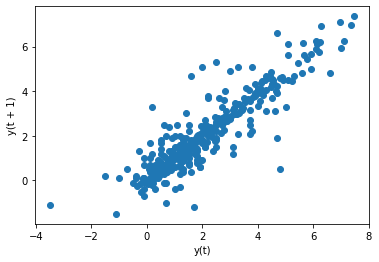

In [49]:
pd.plotting.lag_plot(pap, lag=1)

In [51]:
lol = pap.corr()
lol

,output_per_capita,consumption_per_capita,investment_per_capita,hours_per_capita,real_interest_rate
output_per_capita,1.000000,-0.024698,0.031429,NaN,0.005745
consumption_per_capita,-0.024698,1.000000,0.967460,NaN,-0.929780
investment_per_capita,0.031429,0.967460,1.000000,NaN,-0.879104
hours_per_capita,NaN,NaN,NaN,NaN,NaN
real_interest_rate,0.005745,-0.929780,-0.879104,NaN,1.000000


### Contemporanous correlation

In [74]:
columns_to_correlate = ['output_per_capita', 'consumption_per_capita', 'investment_per_capita', 'hours_per_capita','real_interest_rate']
for column in columns_to_correlate:
    correlation = pap['output_per_capita'].corr(pap[column])
    print(correlation)

1.0
-0.024697552024283316
0.03142948301988155
nan
0.005745376648519888


In [111]:
dict = {'output_per_capita': [1.0],
       'consumption_per_capita': [-0.024697552024283316],
       'investment_per_capita': [0.03142948301988155],
       'hours_per_capita': [0],
       'real_interest_rate': [0.005745376648519888]}
corr_data = pd.DataFrame(dict)
corr_data.index = ['correlation_with_output']
corr_data
hello = corr_data.transpose()
hello

,correlation_with_output
output_per_capita,1.000000
consumption_per_capita,-0.024698
investment_per_capita,0.031429
hours_per_capita,0.000000
real_interest_rate,0.005745


### Final table 2

In [112]:
final2 = pd.concat([std_d, rstd_d, hello], axis = 1)
final2

,standard_deviation,relative_standard_deviation,correlation_with_output
output_per_capita,1.665725,90.054319,1.000000
consumption_per_capita,0.130310,20.979884,-0.024698
investment_per_capita,0.231690,37.302160,0.031429
hours_per_capita,0.000000,0.000000,0.000000
real_interest_rate,1.882941,75.758920,0.005745
